# Reinforcement Learning Project
<font color=red>Where is your work?</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
# make the figures legible
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

# This function is provided to make your life easier. It generates the wireframe plots that 
# Figures 5 and 6 use to display model output.
# To use the function you need to provide delta as a matrix of size num_trials * num_timesteps.
# Since Figures 5 and 6 only display limited timesteps, you must also specify timemin and timemax.
# Other arguments:
#   - elev, azim: changes the viewing angle for the plot
#   - zlabel: the label for the vertical axis
#   - fineness: determines density of wireframe. must be an integer. smaller numbers are finer.
def DeltaPlot3D(delta, time_min, time_max, elev=17, azim=265, zlabel='delta', fineness=1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = np.zeros(delta.shape)
    y = np.zeros(delta.shape)
    for i in range(delta.shape[0]):
        for j in range(delta.shape[1]):
            x[i][j] = i
            y[i][j] = j

    ax.plot_wireframe(x[:,time_min:time_max], y[:,time_min:time_max], delta[:,time_min:time_max], rstride=fineness, cstride=fineness)
    ax.view_init(elev, azim)
    plt.gca().invert_yaxis()
    ax.set_xlabel('trial')
    ax.set_ylabel('timestep')
    ax.set_zlabel(zlabel)
    ax.xaxis.set_ticks(range(0, delta.shape[0], 50))
    ax.yaxis.set_ticks(range(time_min, time_max, 5))
    plt.show()

## Problem 1: Figure 5
### Part A
Reproduce Figure 5A. The stimulus should turn on at timestep 41 and the reward should be delivered on every trial at timestep 54.

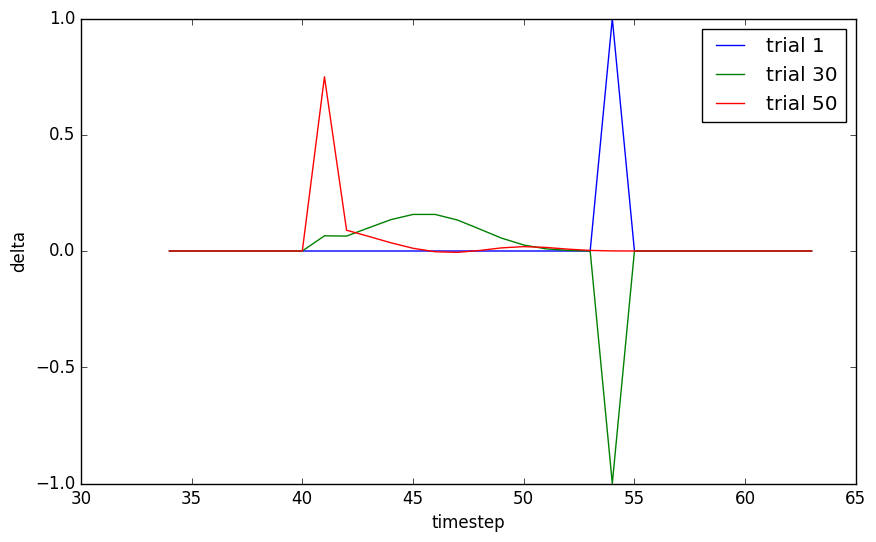

In [6]:
num_trials = 100
num_timesteps = 65

eta = .3
w = np.zeros(20)
delta = np.zeros((num_trials, num_timesteps))

Vprevious = 0
xprevious = np.zeros(20)
for trial in range(num_trials):
    for time in range(num_timesteps):
        x = np.zeros(20)
        if time >= 41 and time < 61:
            x[time-41] = 1
            
        Vt = 0 
        for i in range(20):
            Vt += x[i] * w[i]
        
        r = 1 if time == 54 and trial != 29 else 0
        
        delta[trial, time] = r + Vt - Vprevious
        
        for i in range(20):
            w[i] = w[i] + eta * xprevious[i] * delta[trial,time]
        
        Vprevious = Vt
        xprevious = x.copy()
        
fig, ax = plt.subplots()
ax.plot(range(34,64), delta[0,34:64], label='trial 1')
ax.plot(range(34,64), delta[29,34:64], label='trial 30')
ax.plot(range(34,64), delta[49,34:64], label='trial 50')
plt.xlabel('timestep')
plt.ylabel('delta')
plt.legend(loc='upper right')
plt.show()

### Part B
Reproduce Figure 5B. Omit the reward on trial 5 and every 15 trials thereafter. Used the function <code>DeltaPlot3D</code> to generate the 3D wireframe plot.

In [ ]:
num_trials = 101
num_timesteps = 65
eta = .3
delta = np.zeros((num_trials, num_timesteps))

########################
# Program the model to determine the value of delta for each
# trial and each timestep
########################
        
DeltaPlot3D(delta, 40, 56)

### Part C
Reproduce Figure 5C. Deliver reward on every trial until trial 55, then stop.

In [ ]:
num_trials = 135
num_timesteps = 65
eta = .3
delta = np.zeros((num_trials, num_timesteps))

########################
# Program the model to determine the value of delta for each
# trial and each timestep
########################
        
DeltaPlot3D(delta, 40, 56)

### Part D
Redo part C, except this time plot $V(t)$ instead of $\delta(t)$.

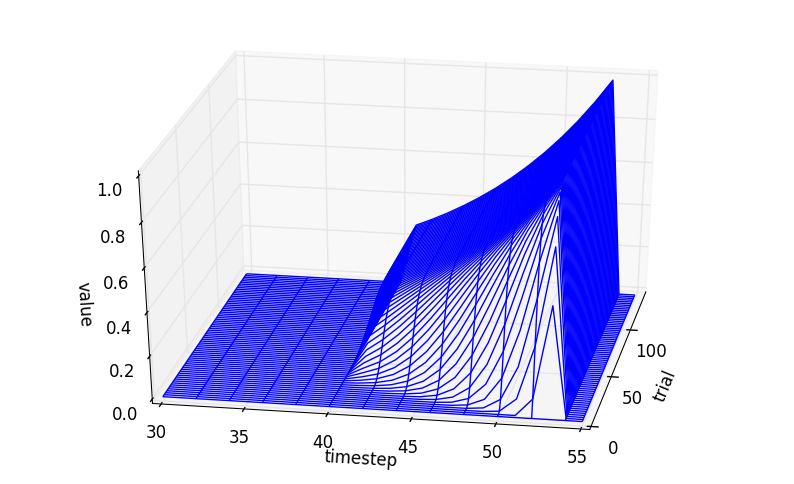

In [18]:
num_trials = 135
num_timesteps = 65
eta = .3
V = np.zeros((num_trials, num_timesteps))

w = np.zeros(20)

gamma = .9
Vprevious = 0
xprevious = np.zeros(20)
for trial in range(num_trials):
    for time in range(num_timesteps):
        x = np.zeros(20)
        if time >= 41 and time < 61:
            x[time-41] = 1
            
        Vt = 0 
        for i in range(20):
            Vt += x[i] * w[i]
        
        r = 1 if time == 54 else 0
        
        delta = r + gamma * Vt - Vprevious
        
        for i in range(20):
            w[i] = w[i] + eta * xprevious[i] * delta
        
        Vprevious = Vt
        xprevious = x.copy()
        
        V[trial, time] = Vt
        
DeltaPlot3D(V, 30, 56, elev=30, azim=190, zlabel='value', fineness=2)

## Problem 2: Figure 6
### Part A
Reproduce Figure 6A. Create weights ($w$) and representations ($x$) for two cues. The first cue should activate at time step 60 on every trial. The second cue should activate randomly between timestep 69 and 71. Reward should be delivered on every trial at timestep 80.

In [ ]:
num_trials = 550
num_timesteps = 90
eta = .05
delta = np.zeros((num_trials, num_timesteps))

########################
# Program the model to determine the value of delta for each
# trial and each timestep
########################
        
DeltaPlot3D(delta, 40, 90, elev=20, azim=200,  fineness=20)

### Part B
Reproduce Figure 6B. Run the model as in Part A except let the second cue activate at timestep 70 on every trial.

In [ ]:
num_trials = 550
num_timesteps = 90
eta = .05
delta = np.zeros((num_trials, num_timesteps))

########################
# Program the model to determine the value of delta for each
# trial and each timestep
########################
        
DeltaPlot3D(delta, 40, 90, elev=20, azim=200,  fineness=15)

# Problem 3: Figure 10

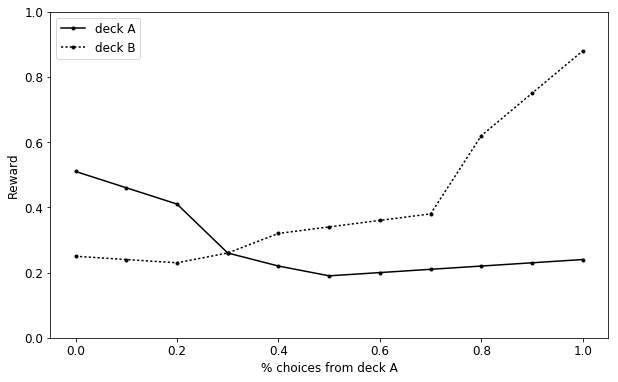

In [2]:
# These functions and variables define the behavioral task. See instructions
# below for more details.

pctA = np.arange(0,1.1,.1)
rA = [0.51, 0.46, 0.41, 0.26, 0.22, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24]
rB = [0.25, 0.24, 0.23, 0.26, 0.32, 0.34, 0.36, 0.38, 0.62, 0.75, 0.88]

choiceHistory = np.array([])

def initilize_task():
    global choiceHistory
    choiceHistory = np.tile([0, 1], 20)

def get_reward_and_pctA(choice):
    global choiceHistory
    pctANow = 10 * np.sum(choiceHistory) / len(choiceHistory)
    if choice == 1:
        reward = (rA[int(np.floor(pctANow))] + rA[int(np.ceil(pctANow))])/2
    else:
        reward = (rB[int(np.floor(pctANow))] + rB[int(np.ceil(pctANow))])/2
    
    toAppend = 0
    if choice == 1:
        toAppend = 1
    choiceHistory = np.append(choiceHistory, toAppend);
    choiceHistory = choiceHistory[1:]
    
    return (reward, pctANow/10)

fix, axis = plt.subplots()
axis.plot(pctA, rA, 'k.-', label='deck A')
axis.plot(pctA, rB, 'k.:', label='deck B')
plt.xlabel('% choices from deck A')
plt.ylabel('Reward')
plt.ylim([0, 1])
plt.legend(loc='upper left')
plt.show()

To get the best results modeling this task, I had to make the following assumptions:
<ol>
<li>"The model randomly chose one deck as the starting point and then 'looked back and forth' between decks" means that <i>(i)</i> until a deck is chosen, $\delta(t)$ is equal to $V(t) - V(t-1)$ where $V(t)$ is the value of the deck currently being looked at and $V(t-1)$ is the value of the other deck; and <i>(ii)</i> $V(t)$ is initially selected to deck A or B with 50/50 probability.</li>
<br>
<li>When a deck is chosen, a reward $r(t)$ is obtained on the next time step. The value $V(t)$ at the time step when reward is received is zero so that $\delta(t) = r(t) - V(t-1)$ and $V(t-1)$ is the value of the chosen deck.</li>
<br>
<li>The probability of selecting is equal to $P_s = \frac{1}{1 + exp(-m \delta(t) + b)}$. Without the negative sign the model will tend to choose the less valuable deck.</li>
</ol>

For coding the task, first call <code>initialize_task()</code>. Then, when a choice is made, call <code>(reward, pctA)=get_reward_and_pctA(choice)</code> where <code>choice=1</code> if deck A is chosen and <code>choice=0</code> if deck B is chosen. You should use <code>reward</code> to determine $\delta(t)$ and update $w_A$ or $w_B$. To test the claims in the paper, store <code>pctA</code> in an array and generate two plots: <i>(1)</i> a plot of <code>pctA</code> over 400 trials of the task, and <i>(2)</i> a histogram of the values of <code>pctA</code> in the final 200 trials.

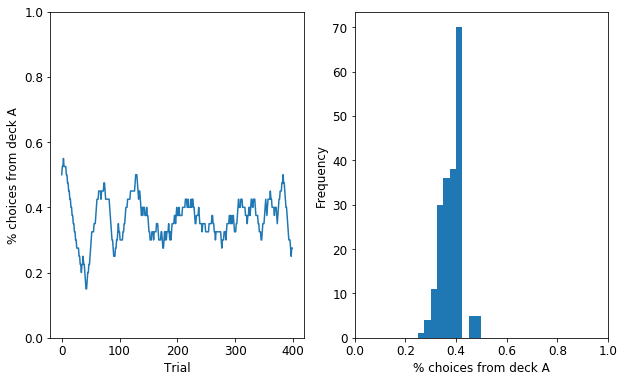

In [3]:
wA = 0
wB = 0
m = 10
b = 0
eta = .3
num_trials = 400

initilize_task()
all_pctA = []

for i in range(num_trials):
    choiceMade = False
    considerA = (np.random.uniform() < .5)
    
    while not choiceMade:
        if considerA:
            xAt = 1
            xAt_1 = 0
            xBt = 0
            xBt_1 = 1
        else:
            xAt = 0
            xAt_1 = 1
            xBt = 1
            xBt_1 = 0
          
        Vt = xAt * wA + xBt * wB
        Vt_1 = xAt_1 * wA + xBt_1 * wB
        
        delta = Vt - Vt_1
        Ps = 1 / (1 + np.exp(-1*m*delta+b))
        
        if np.random.uniform() < Ps:
            choiceMade = True
            if considerA:
                (r,pA) = get_reward_and_pctA(1)
                all_pctA.append(pA)
                wA += eta * (r - Vt)
            else:
                (r,pA) = get_reward_and_pctA(0)
                all_pctA.append(pA)
                wB += eta * (r - Vt)
        else:
            considerA = not considerA

(fig, axes) = plt.subplots(1,2)
axes[0].plot(all_pctA)
axes[0].set_ylim([0, 1])
axes[0].set_xlabel('Trial')
axes[0].set_ylabel('% choices from deck A')
axes[1].hist(all_pctA[200:])
axes[1].set_xlim([0, 1])
axes[1].set_xlabel('% choices from deck A')
axes[1].set_ylabel('Frequency')
plt.show()